# Data Scientist Associate Practical Exam Submission

## Task 1 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

df = pd.read_csv("fitness_class_2212.csv")
df

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,Fri,AM,HIIT,0
1496,1497,29,89.55,2,Mon,AM,Strength,0
1497,1498,9,87.38,4,Tue,AM,HIIT,0
1498,1499,34,68.64,14,Sun,AM,Aqua,0


In [3]:
df.describe()

,booking_id,months_as_member,weight,attended
count,1500.000000,1500.000000,1480.000000,1500.000000
mean,750.500000,15.628667,82.610378,0.302667
std,433.157015,12.926543,12.765859,0.459565
min,1.000000,1.000000,55.410000,0.000000
25%,375.750000,8.000000,73.490000,0.000000
50%,750.500000,12.000000,80.760000,0.000000
75%,1125.250000,19.000000,89.520000,1.000000
max,1500.000000,148.000000,170.520000,1.000000


In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

**Column booking_id** correct, missing null values and all values uniq

In [5]:
print(f'Count uniq values: {df["booking_id"].unique().shape[0]}')
print(f'Count nan values: {df["booking_id"].isnull().sum()}')

Count uniq values: 1500
Count nan values: 0


**Column months_as_member** correct, missing null values and all values are logical. Minimum 1, maximum 148.

In [6]:
print(f'Count uniq values: {df["months_as_member"].unique().shape[0]}')
print(f'Count nan values: {df["months_as_member"].isnull().sum()}')

Count uniq values: 72
Count nan values: 0


**Column weight** was wrong. I replaced nan with the mean of the column.

In [7]:
print(f'Count uniq values: {df["weight"].unique().shape[0]}')
print(f'Count nan values: {df["weight"].isnull().sum()}')

df['weight'].fillna(df['weight'].mean(), inplace = True)

print(f'Count uniq values: {df["weight"].unique().shape[0]}')
print(f'Count nan values: {df["weight"].isnull().sum()}')


Count uniq values: 1242
Count nan values: 20
Count uniq values: 1242
Count nan values: 0


**Column days_before** was wrong. The data type was an object. And also some values had a suffix ' days'

First, I delete from string ' days', and converted the column to int.

In [8]:
print(f'Count uniq values: {df["days_before"].unique().shape[0]}')
print(f'Count nan values: {df["days_before"].isnull().sum()}')
print(f"Type of column days_before: {df['days_before'].dtypes}")
print(f'Uniq value: {df["days_before"].unique()}')

df['days_before'] = df['days_before'].str.replace(' days', '')
df['days_before'] = pd.to_numeric(df['days_before'])

print(f"Type of column days_before after corrections: {df['days_before'].dtypes}")
print(f"Uniq value after corrections: {df['days_before'].unique()}")


Count uniq values: 31
Count nan values: 0
Type of column days_before: object
Uniq value: ['8' '2' '14' '10' '6' '4' '9' '12' '5' '3' '7' '13' '12 days' '20' '1'
 '15' '6 days' '11' '13 days' '3 days' '16' '1 days' '7 days' '8 days'
 '10 days' '14 days' '17' '5 days' '2 days' '4 days' '29']
Type of column days_before after corrections: int64
Uniq value after corrections: [ 8  2 14 10  6  4  9 12  5  3  7 13 20  1 15 11 16 17 29]


**Column day_of_week** was wrong. There were incorrect entries for the values 'Wed','Fri','Mon'. I replaced them with the correct ones and now the data in the column is correct.

In [9]:
print(f'Count uniq values: {df["day_of_week"].unique().shape[0]}')
print(f'Count nan values: {df["day_of_week"].isnull().sum()}')
print(f'Uniq value: {df["day_of_week"].unique()}')

df['day_of_week'] = df['day_of_week'].replace(['Wednesday','Fri.','Monday'],['Wed','Fri','Mon'])

print(f'Count uniq values: {df["day_of_week"].unique().shape[0]}')
print(f'Uniq value: {df["day_of_week"].unique()}')

Count uniq values: 10
Count nan values: 0
Uniq value: ['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Wednesday' 'Fri.' 'Tue' 'Sat' 'Monday']
Count uniq values: 7
Uniq value: ['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Tue' 'Sat']


**Column time** correct, missing null values and all values are logical.

In [10]:
print(f'Count uniq values: {df["time"].unique().shape[0]}')
print(f'Count nan values: {df["time"].isnull().sum()}')
print(f'Uniq value: {df["time"].unique()}')

Count uniq values: 2
Count nan values: 0
Uniq value: ['PM' 'AM']


**Column category** was wrong. Missing values were '-'. I replaced them with 'unknown'

In [11]:
print(f'Count uniq values: {df["category"].unique().shape[0]}')
print(f'Count nan values: {df["category"].isnull().sum()}')
print(f'Uniq value: {df["category"].unique()}')

df['category'] = df['category'].replace('-', 'unknown')
print(f'Uniq value: {df["category"].unique()}')

Count uniq values: 6
Count nan values: 0
Uniq value: ['Strength' 'HIIT' 'Cycling' 'Yoga' '-' 'Aqua']
Uniq value: ['Strength' 'HIIT' 'Cycling' 'Yoga' 'unknown' 'Aqua']


**Column attended** correct, missing null values and all values are logical.

In [12]:
print(f'Count uniq values: {df["attended"].unique().shape[0]}')
print(f'Count nan values: {df["attended"].isnull().sum()}')
print(f'Uniq value: {df["attended"].unique()}')

Count uniq values: 2
Count nan values: 0
Uniq value: [0 1]


The data was successfully read and put in order. We conducted the dataset in accordance with the criteria described in the task.
It was necessary to transform the data, replace gaps / non-corret values, or convert the data storage format.

## Task 2

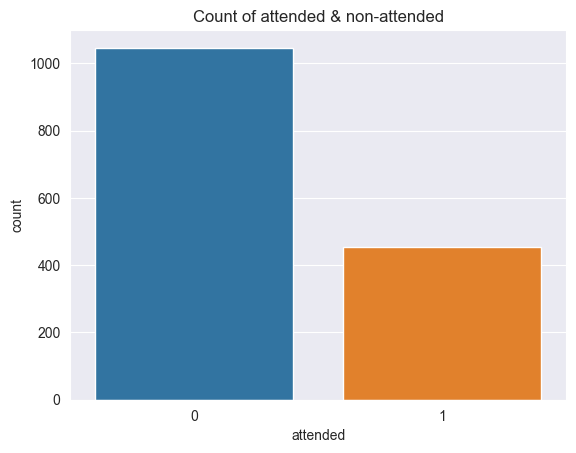

In [13]:
sns.countplot(x=df.attended)
plt.title('Count of attended & non-attended')
plt.show()

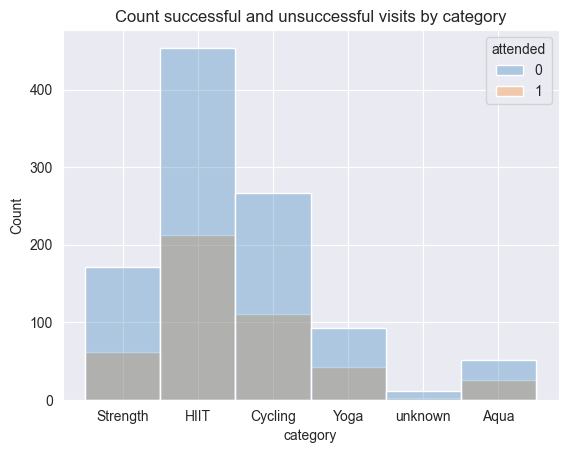

In [14]:
sns.histplot(x=df.category, hue=df.attended, alpha=0.3)
plt.title('Count successful and unsuccessful visits by category')
plt.show()

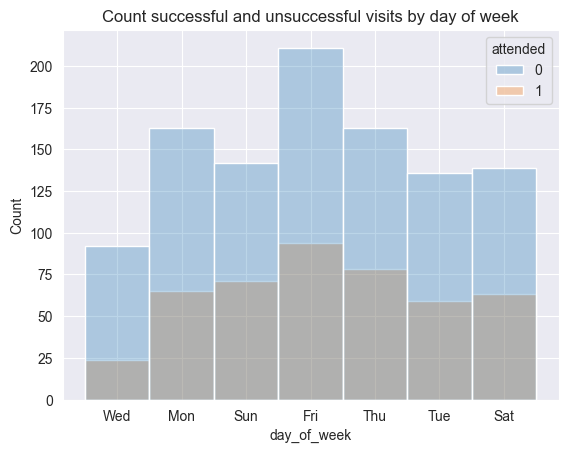

In [15]:
sns.histplot(x=df.day_of_week, hue=df.attended, alpha=0.3)
plt.title('Count successful and unsuccessful visits by day of week')
plt.show()

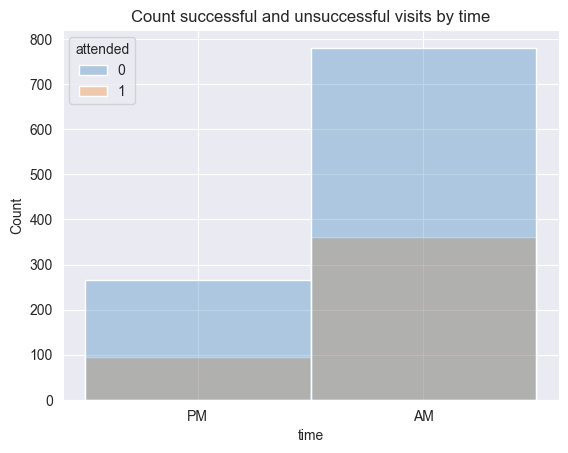

In [16]:
sns.histplot(x=df.time, hue=df.attended, alpha=0.3)
plt.title('Count successful and unsuccessful visits by time')
plt.show()

According to the chart above, the largest number entries per category HIIT.

At the same time, the observations are not balanced by category. Eg:
- The number of entries for the evening is much more than for the morning
- The most popular category is HIIT, and the smallest yoga and aqua. They are almost 5 times worse on records than HIIT
- Also, entries are not evenly distributed over the days, most of all on Friday, and least of all on Wednesday.

## Task 3

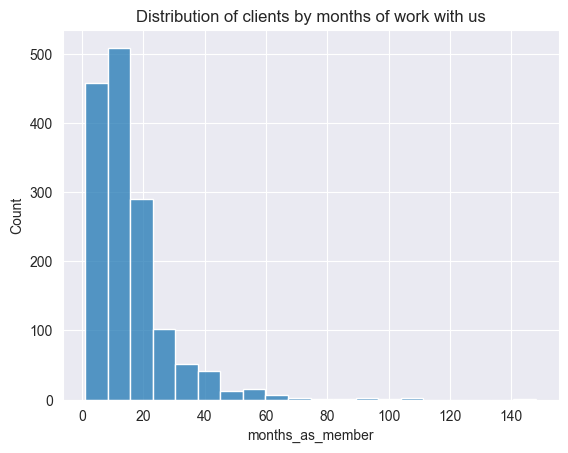

In [17]:
sns.histplot(x=df.months_as_member, bins=20)
plt.title('Distribution of clients by months of work with us')
plt.show()

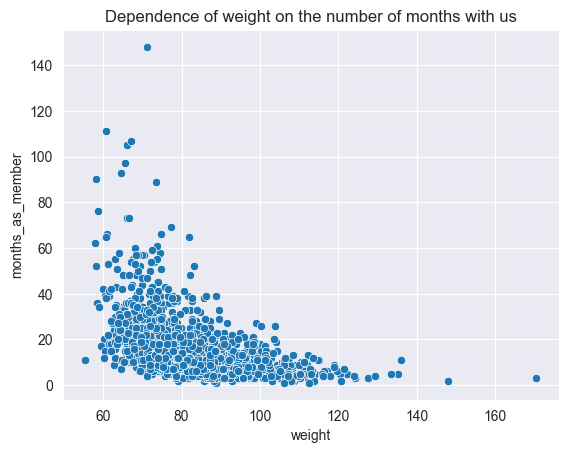

In [18]:
sns.scatterplot(x=df.weight, y=df.months_as_member)
plt.title('Dependence of weight on the number of months with us')
plt.show()

Most of the entries are from clients who have been with us for less than 20 months. 

## Task 4

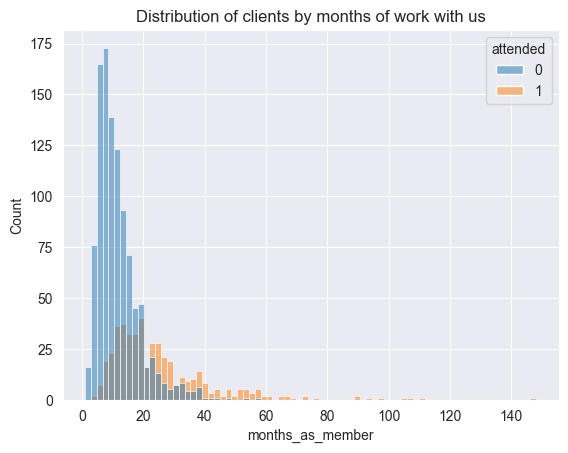

In [19]:
sns.histplot(x=df.months_as_member, hue=df.attended)
plt.title('Distribution of clients by months of work with us')
plt.show()

Most of the entries are from clients who have been with us for less than 20 months. At the same time, for these clients, the number of non-visits is higher than the number of visits.

And clients who have been with us for more than 20 months are more likely to come than they miss. Whereas 40+ months clients almost never miss 

## Task 5

Based on the task - "Business wants to predict whether participants will come using the data provided.", As well as the data that we have. Before us is a classic classification task - obtaining a categorical answer based on a set of features.
In fact, this task can be viewed as a clustering task - the distribution of data into groups. In our case, there are two groups.

For the convenience of work, it will be necessary to carry out LabelEncoding.

## Task 6

In [20]:
df2 = df.copy(deep=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1500 non-null   float64
 3   days_before       1500 non-null   int64  
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 93.9+ KB


In [21]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df2['day_of_week'] = labelencoder.fit_transform(df2['day_of_week'])
df2['time'] = labelencoder.fit_transform(df2['time'])
df2['category'] = labelencoder.fit_transform(df2['category'])

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1500 non-null   float64
 3   days_before       1500 non-null   int64  
 4   day_of_week       1500 non-null   int32  
 5   time              1500 non-null   int32  
 6   category          1500 non-null   int32  
 7   attended          1500 non-null   int64  
dtypes: float64(1), int32(3), int64(4)
memory usage: 76.3 KB


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X,y = df2.loc[:,df2.columns != 'attended'], df2.loc[:,'attended']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [35]:
logreg = LogisticRegression(random_state=42, max_iter=300)

logreg.fit(X_train, y_train)

logreg_y_pred = logreg.predict(X_test)

print(f'With Log Reg on train accuracy is: {logreg.score(X_train,y_train):.5f}')
print(f'With Log Reg on test accuracy is: {logreg.score(X_test,y_test):.5f}')

With Log Reg on train accuracy is: 0.78571
With Log Reg on test accuracy is: 0.73556


## Task 7

In [25]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)

rfc.fit(X_train, y_train)

rfc_y_pred = rfc.predict(X_test)

print(f'With RandomForestClassifier on train accuracy is: {rfc.score(X_train,y_train):.5f}')
print(f'With RandomForestClassifier on test accuracy is: {rfc.score(X_test,y_test):.5f}')

With RandomForestClassifier on train accuracy is: 0.80286
With RandomForestClassifier on test accuracy is: 0.74889


## Task 8

The first model I chose is LogisticRegression.
This is one of the simplest and most popular models. And also this is the first thing that came to mind for the task of binary classification.

The second model I chose is RandomForestClassifier.
When teaching, I liked the ideas of the ensemble models. At its core, it uses decision trees, and bootstrap aggregating, which increases the stability of the algorithm on unknown new data.

## Task 9

In [26]:
print(f'With Log Reg on test accuracy is: {logreg.score(X_test,y_test):.5f}')
print(f'With RandomForestClassifier on test accuracy is: {rfc.score(X_test,y_test):.5f}')

With Log Reg on test accuracy is: 0.73556
With RandomForestClassifier on test accuracy is: 0.74889


In [27]:
logreg_report = classification_report(y_test, logreg_y_pred, target_names=['Non-Attended', 'Attended'])
print(logreg_report)

rfc_report = classification_report(y_test, rfc_y_pred, target_names=['Non-Attended', 'Attended'])
print(rfc_report)

              precision    recall  f1-score   support

Non-Attended       0.73      0.94      0.82       293
    Attended       0.75      0.36      0.49       157

    accuracy                           0.74       450
   macro avg       0.74      0.65      0.66       450
weighted avg       0.74      0.74      0.71       450

              precision    recall  f1-score   support

Non-Attended       0.74      0.95      0.83       293
    Attended       0.81      0.37      0.51       157

    accuracy                           0.75       450
   macro avg       0.77      0.66      0.67       450
weighted avg       0.76      0.75      0.72       450



In [28]:
pd.DataFrame(confusion_matrix(y_test,logreg_y_pred),\
            columns=["Predicted Not-Attended", "Predicted Attended"],\
            index=["Not-Attended","Attended"] )

,Predicted Not-Attended,Predicted Attended
Not-Attended,274,19
Attended,100,57


In [29]:
pd.DataFrame(confusion_matrix(y_test,rfc_y_pred),\
            columns=["Predicted Not-Attended", "Predicted Attended"],\
            index=["Not-Attended","Attended"] )

,Predicted Not-Attended,Predicted Attended
Not-Attended,279,14
Attended,99,58


Three metrics were selected for comparison:
- the simplest, built-in - accuracy_score
- classification_report for a more accurate assessment of several parameters in the context of potential answers
- confusion_matrix is an important metric, primarily for assessing classification errors and their types

## Task 10

**According to the results of all three metrics, the model showed the best result - RandomForestClassifier**

It gave better accuracy. This metric cannot always be relied upon, especially if the classes are uneven. Our classes are not completely uniform. But at the same time, this is not a ratio of 1 to 10.

It gave a higher result in the recall metric and precision in the classification_report for each response class. This shows that it is better at detecting classes and distinguishing each class from the other.
Precision and recall do not depend, unlike accuracy, on the ratio of classes and therefore are applicable in conditions of unbalanced samples.

Our task is to find clients who have signed up but will not come.

Obviously, we cannot find everyone who will not come and only them. But, we can choose the necessary thresholds for precision and recall. For example, you can focus on those who definitely will not come, while our accuracy may not be the highest. But we will definitely minimize false-positive answers and the chance of making a mistake.

This is just one of the possible strategies in this situation. We can also try other models (2 is not a lot), as well as Fine-Tuning for model hyperparameters.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam